In [5]:
#!pip install torch==1.3.0 torchvision==0.4.1
#!pip3 install medicaltorch

In [4]:
#!unzip  /content/drive/MyDrive/Task02_Heart.zip

In [6]:
from collections import defaultdict
import time
import os

import numpy as np

from tqdm import tqdm


from medicaltorch import datasets as mt_datasets
from medicaltorch import models as mt_models
from medicaltorch import transforms as mt_transforms
from medicaltorch import losses as mt_losses
from medicaltorch import metrics as mt_metrics
from medicaltorch import filters as mt_filters

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import autograd, optim
import torch.backends.cudnn as cudnn
import torch.nn as nn

import torchvision.utils as vutils

cudnn.benchmark = True
import matplotlib.pyplot as plt
%matplotlib inline

get image filenames and gt filenames 

In [29]:
ROOT_DIR_I = "/content/Task02_Heart/imagesTr"
ROOT_DIR_L = "/content/Task02_Heart/labelsTr"

itf = []
gtf = []
for f in os.listdir(ROOT_DIR_I):
  if f.startswith("._"):
    pass
  else :
    fname = os.path.join(ROOT_DIR_I,f)
    itf.append(fname)
   
#print(len(itf))


for f in os.listdir(ROOT_DIR_L):
  if f.startswith("._"):
    pass
  else :
    fname = os.path.join(ROOT_DIR_L,f)
    gtf.append(fname)
   
#print(len(gtf))



making paris for SegmentationPair2D

In [42]:
pairs = []

for i in range(20):
  #pair = mt_datasets.SegmentationPair2D(itf[i],gtf[i])
  pair = (itf[i],gtf[i])
  pairs.append(pair)

print(len(pairs))

20


In [43]:
"""
for pair in pairs:
  slice_pair = pair.get_pair_slice(10) 
  input_slice = slice_pair["input"]
  print(input_slice.shape)
  img = input_slice
  plt.imshow(img,cmap='gray')
  plt.show()
"""

'\nfor pair in pairs:\n  slice_pair = pair.get_pair_slice(10) \n  input_slice = slice_pair["input"]\n  print(input_slice.shape)\n  img = input_slice\n  plt.imshow(img,cmap=\'gray\')\n  plt.show()\n'

In [62]:

train_transform = transforms.Compose([
        #mt_transforms.Resample(0.25, 0.25),
        mt_transforms.CenterCrop2D((256, 256)),

        mt_transforms.ElasticTransform(alpha_range=(28.0, 30.0),
                                       sigma_range=(3.5, 4.0),
                                       p=0.3),
        mt_transforms.RandomAffine(degrees=4.6,
                                   scale=(0.98, 1.02),
                                   translate=(0.03, 0.03)),
        mt_transforms.ToTensor(),
        mt_transforms.NormalizeInstance(),
])

In [63]:
train_dataset = mt_datasets.MRI2DSegmentationDataset(pairs,transform=train_transform)

In [64]:
print(len(train_dataset))

2271


In [65]:
train_dataloader = DataLoader(train_dataset, batch_size=16,
                        shuffle=True, num_workers=1,
                        collate_fn=mt_datasets.mt_collate)

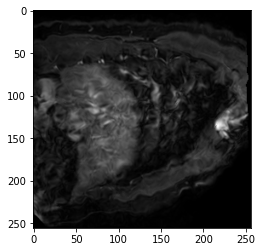

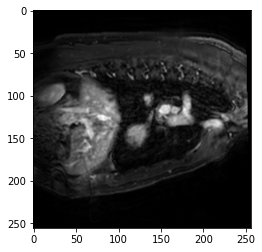

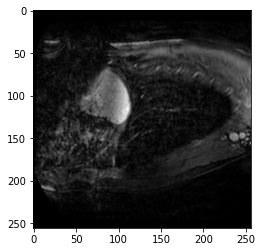

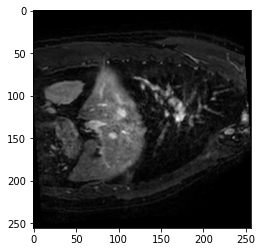

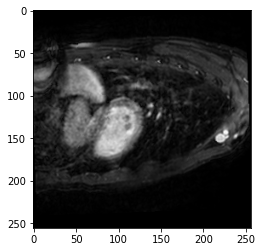

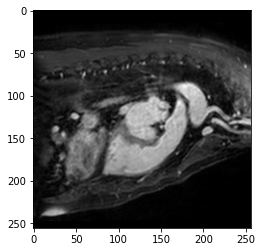

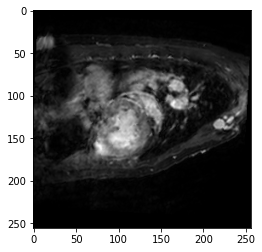

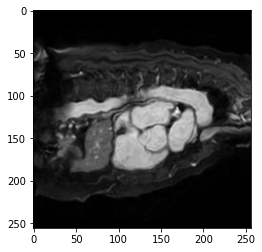

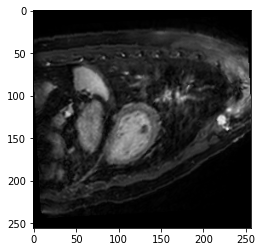

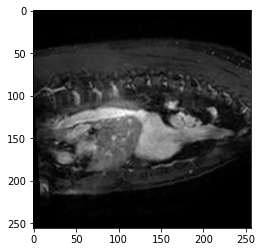

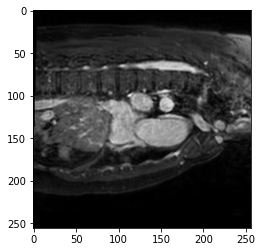

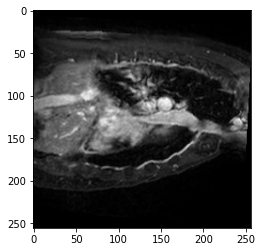

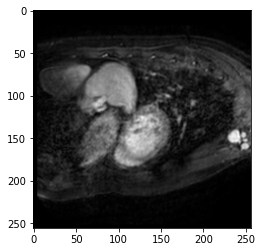

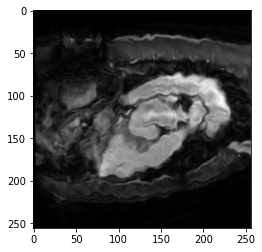

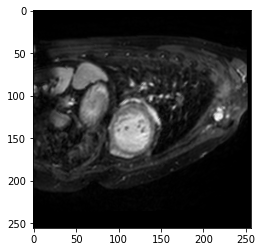

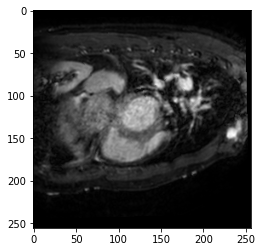

In [71]:

batch = next(iter(train_dataloader))

for item in batch['input']:
    plt.imshow(item.squeeze(0),cmap = 'gray')
    plt.show()


